√ 一元回归探索: 请选择 TV 这一个特征作为输入X,Sales 作为目标 y，重复我们实验课第一部分的核心步骤:
1.使用 scikit-learn 训练一个一元线性回归模型
2.在散点图上画出你训练好的拟合直线

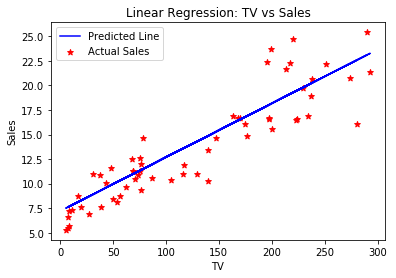

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = []
y = []
with open('advertising.csv','r',encoding = 'utf-8') as file:
    next(file)
    for line in file:
        tv, radio, newspaper, sales = line.strip().split(',')
        X.append(float(tv))
        y.append(float(sales))
X = np.array(X).reshape(-1, 1)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.3,
    random_state = 42,
    shuffle = True
)
line = LinearRegression()
line.fit(X_train,y_train)
y_pred = line.predict(X_test)
plt.scatter(X_test, y_test, color='r', marker='*', label='Actual Sales')
plt.plot(X_test, y_pred, color='b', label='Predicted Line')
plt.title('Linear Regression: TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

多元回归实战: 现在，请使用 TV,Radio,Newspaper 全部三个特征作为输入XSales 作为目标 y，重复我们实验课第二部分的核心流程!
1.划分训练集和测试集(测试集比例自定，如25%)。
2.(思考)你认为这个数据集需不需要进行特征缩放?为什么?
3.训练一个多元线性回归模型
4.在测试集上评估你的模型(R2),并分析哪个广告渠道对销量的影响最大


标准化后各特征对销量影响力排序：


,Feature,Standardized Coefficient,Absolute Value
0,TV,4.668138,4.668138
1,Radio,1.494965,1.494965
2,Newspaper,0.094210,0.094210


对销量影响力最大的是TV
多元线性回归预测效果 (R² = 0.906)


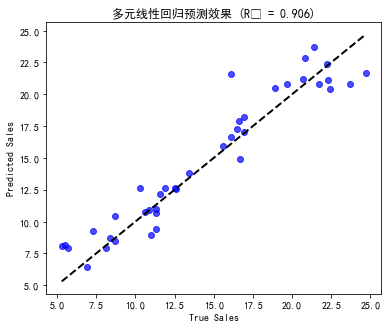

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("advertising.csv")
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 42,
    shuffle = True
)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
# TV_,Radio_,Newspaper_ = np.abs(model.coef_)
# influence = {'TV':TV_,'Radio':Radio_,'Newspaper':Newspaper_}
# print(f"影响力排序为:{}")
coef_df = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Standardized Coefficient': model.coef_,
    'Absolute Value': np.abs(model.coef_)
}).sort_values(by='Absolute Value', ascending=False)
print("\n标准化后各特征对销量影响力排序：")
display(coef_df)
print(f"对销量影响力最大的是{coef_df['Feature'][0]}")
print(('多元线性回归预测效果 (R² = %.3f)' % r2))

plt.figure(figsize=(6,5))
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.title('多元线性回归预测效果 (R² = %.3f)' % r2)
plt.show()

Full dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6



Train / Test sizes: 140 train rows, 60 test rows

Training features (first rows):


,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5



Training target (first rows):


169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64


Correlation matrix (features + target):


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000



LinearRegression (unscaled) test R^2: 0.9091

Coefficients (original units):


,feature,coefficient
0,Intercept,4.743767
1,TV,0.053589
2,Radio,0.102707
3,Newspaper,0.007932



Predictions on test set:


,y_true,y_pred
0,16.9,17.159919
1,22.4,20.533695
2,21.4,23.689144
3,7.3,9.519146
4,24.7,21.607368
5,12.6,12.781013
6,22.3,21.086363
7,8.4,8.760542
8,16.5,17.115000
9,16.1,16.687896



Standardized coefficients (fit on z-scored X and y):


,feature,std_coefficient
0,TV,0.873896
1,Radio,0.292169
2,Newspaper,0.031910



VIF (Variance Inflation Factor) on training features:


,feature,VIF
0,TV,1.004495
1,Radio,1.135946
2,Newspaper,1.132250



Statsmodels OLS summary (training set):
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           1.69e-65
Time:                        20:03:24   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

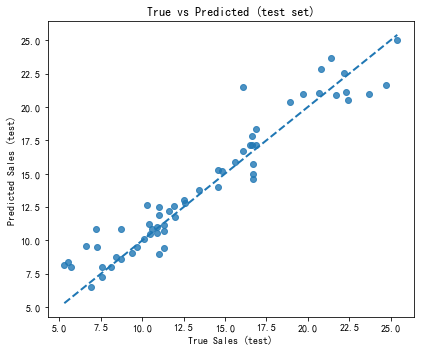


Summary: which advertisement channel affects Sales the most (by absolute standardized coefficient)?


,feature,std_coefficient,abs_stdcoef
0,TV,0.873896,0.873896
1,Radio,0.292169,0.292169
2,Newspaper,0.031910,0.031910



Interpretation notes:
- Larger absolute standardized coefficient means a stronger effect on Sales when predictors are measured in standard deviations.
- Check VIF values: VIF > 5 (or >10) typically indicates problematic multicollinearity that can inflate coefficient variances.
- Statsmodels summary above provides p-values to assess statistical significance on the training set (small dataset limits reliability).

Recovered coefficients in original units (from standardized model):


,feature,beta_from_std
0,TV,0.053589
1,Radio,0.102707
2,Newspaper,0.007932


Recovered intercept: 4.74376670158969


In [4]:
"""
多元线性回归（含详细中文注释与深入解释）

本文件基于你提供的代码，做了逐行中文注释并补充了内部原理、各类常用参数解释、工程注意点、与若干实用扩展（例如：标准化系数如何逆变换回原始单位、使用 Pipeline 与正则化的建议、VIF 的解释等）。

总体流程：
 1. 读取 CSV 数据 -> pandas DataFrame
 2. 划分训练/测试集（train_test_split）
 3. 用未缩放(X 原始单位)的训练集训练线性回归（LinearRegression），得到原始系数（便于业务解释）
 4. 把 X 与 y 做标准化（StandardScaler），在标准化数据上训练线性回归以得到标准化系数（便于比较特征相对影响力）
 5. 计算 VIF（Variance Inflation Factor）检查多重共线性
 6. 使用 statsmodels 输出 OLS 汇总（系数、标准误、t、p 值、R^2 等）以便做统计检验
 7. 绘制测试集真实值 vs 预测值 的对比图
 8. 提供逆变换（从标准化系数恢复至原始单位）与 Pipeline / 正则化的示例

警告与工程提示：
 - 样本量非常小（本例只有 7 条），因此任何统计结论（p 值、R^2、系数显著性）都高度不稳定且不可靠。
 - 在真实项目中应使用交叉验证、bootstrap 或增加样本量以获得稳健结论。
 - 在使用标准化/归一化时，严格采用在训练集上 fit，然后对验证/测试集使用 transform，避免数据泄露（data leakage）。

下面是逐行代码与注释：
"""

# ----------------------------
# 0) 导入常用库与说明
# ----------------------------
from io import StringIO
# StringIO: 把字符串当作文件对象来读写（在没有独立 csv 文件时非常方便）

import pandas as pd
# pandas: 处理表格数据的核心库，DataFrame 是主力数据结构。

import numpy as np
# numpy: 数值计算基础库，主要用于数组/矩阵运算。

import matplotlib.pyplot as plt
# matplotlib: 基础绘图库，用于绘图（注意：如果在 Jupyter 中，可用 %matplotlib inline）

from sklearn.model_selection import train_test_split
# train_test_split: 用于把数据划分为训练集和测试集（或验证集）
# 常用参数：
# - test_size: 测试集所占比例（例如 0.25 表示 25%）或整数（样本数）
# - train_size: 训练集占比（可与 test_size 二选一）
# - random_state: 随机种子（保证可复现）
# - shuffle: 是否先打乱（默认 True）

from sklearn.preprocessing import StandardScaler
# StandardScaler: 标准化（z-score），将特征转换为均值 0、标准差 1
# 常用属性：
# - fit(X): 计算训练集 X 的均值（mean_）和标准差（scale_ / var_）
# - transform(X): 使用 fit 得到的参数把 X 转换
# - fit_transform(X): fit 然后 transform（简写）
# 常用属性在 fit 之后可访问：mean_, var_, scale_

from sklearn.linear_model import LinearRegression
# LinearRegression: 普通最小二乘线性回归的 sklearn 实现（封装了直接解的求法）
# 主要参数：
# - fit_intercept=True: 是否拟合截距（默认 True）。若数据已中心化，可设为 False。
# - copy_X=True: 是否复制 X（True 时会复制，False 时可能就地修改以节省内存）。
# - n_jobs=None: 并行计算时可用的核数（在某些实现如带正则化或大规模数据时有用）。
# 常用属性（在 fit 之后）：
# - coef_: 回归系数数组（shape = n_features，顺序与 X 的列一致）
# - intercept_: 截距（标量）

from sklearn.metrics import r2_score
# r2_score: 计算 R^2（决定系数），衡量模型对目标方差的解释比例。
# R^2 = 1 - (RSS/TSS)，值范围可为负（模型可比常数预测更差）。

# 下面我们为 VIF（方差膨胀因子）计算临时使用 sklearn 的 LinearRegression
from sklearn.linear_model import LinearRegression as LR_for_vif

import statsmodels.api as sm
# statsmodels: 提供更详细的统计回归结果（如系数标准误、t 值、p 值、诊断统计量等）
# 使用方法常见流程：添加常数列 -> sm.OLS(y, X_with_const).fit() -> .summary()

# ----------------------------
# 1) 读取并展示数据
# ----------------------------

# pd.read_csv 可以直接读文件路径，也可以读文件句柄
df = pd.read_csv("advertising.csv")
print("Full dataset:")
# display: 在 Jupyter 中以表格形式显示 DataFrame。若在脚本中没有 display，可用 print(df)
display(df)

# ----------------------------
# 2) 准备特征矩阵 X 和目标向量 y
# ----------------------------
# .copy() 是为了避免后续对 X 的操作（如缩放）影响原始 DataFrame，避免警告
X = df[['TV', 'Radio', 'Newspaper']].copy()
y = df['Sales'].copy()

# ----------------------------
# 3) 划分训练集和测试集
# ----------------------------
# 说明：训练模型需要训练数据，测试集用于评估泛化能力（不能用测试集做训练相关操作）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTrain / Test sizes:", X_train.shape[0], "train rows,", X_test.shape[0], "test rows")
print("\nTraining features (first rows):")
display(X_train.head())
print("\nTraining target (first rows):")
display(y_train.head())

# 注：样本非常少，训练 5 条、测试 2 条。现实中这会导致评估高度不稳定。

# ----------------------------
# 4) 是否需要做特征缩放（简单诊断）
# ----------------------------
print("\nCorrelation matrix (features + target):")
display(df.corr())
# 这里给出相关矩阵，便于观察自变量与目标之间的线性相关性，以及自变量间是否相关（共线性初步迹象）。

# ----------------------------
# 5) 在未缩放数据上训练线性回归（便于给出原始单位的系数，利于业务解释）
# ----------------------------
lr = LinearRegression()  # 默认 fit_intercept=True
# fit(X, y): 在训练集上估计系数
lr.fit(X_train, y_train)

# predict(X): 用学得的模型对新样本做预测
y_pred = lr.predict(X_test)

# r2_score(y_true, y_pred): 衡量模型的解释力（测试集）
r2 = r2_score(y_test, y_pred)
print(f"\nLinearRegression (unscaled) test R^2: {r2:.4f}")

# 将系数以 DataFrame 展示，包含截距
coef_df = pd.DataFrame({
    'feature': ['Intercept'] + X.columns.tolist(),
    'coefficient': [lr.intercept_] + lr.coef_.tolist()
})
print("\nCoefficients (original units):")
display(coef_df)

print("\nPredictions on test set:")
pred_df = pd.DataFrame({'y_true': y_test.values, 'y_pred': y_pred})
display(pred_df)

# 说明：原始系数的含义是以原单位衡量的边际效应，例如 coef_TV 表示 TV 增加 1 单位时 Sales 的增量（在其他变量不变时）。

# ----------------------------
# 6) 标准化：获得标准化系数（便于比较不同量纲特征的影响力）
# ----------------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# fit_transform 在训练集上先 fit（计算 mean_, scale_），再 transform（把数据转换为 z-score）
X_train_scaled = scaler_X.fit_transform(X_train)
# transform 在测试集上仅使用训练集的 mean_ 和 scale_ 来标准化（避免泄露测试信息）
X_test_scaled = scaler_X.transform(X_test)

# 对目标 y 做相同处理（注意 sklearn 的 StandardScaler 要求二维输入）
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

# 在标准化后的数据上训练线性回归
lr_std = LinearRegression()
lr_std.fit(X_train_scaled, y_train_scaled)

std_coefs = lr_std.coef_
std_coef_df = pd.DataFrame({'feature': X.columns, 'std_coefficient': std_coefs})
print("\nStandardized coefficients (fit on z-scored X and y):")
display(std_coef_df)

# 说明：标准化系数 beta_std 表示当某特征增加 1 个标准差时，目标 y 增加多少个标准差。对比绝对值可判断相对影响力。

# ----------------------------
# 7) 计算 VIF（方差膨胀因子）以检测多重共线性
# ----------------------------
# VIF 的计算思路：对第 j 个特征，先用其它特征去回归它，得到 R_j^2；
# VIF_j = 1 / (1 - R_j^2)。R_j^2 越接近 1，说明第 j 个特征可以被其它特征很好地线性预测（即高度共线）。
# 一般经验：VIF > 5 或 VIF > 10 被认为有问题（取决于领域和经验）。

def compute_vif(X_df):
    X_mat = X_df.values
    vif_values = []
    for i in range(X_mat.shape[1]):
        # 把第 i 列当作被解释变量，其它列作为解释变量
        y_i = X_mat[:, i]
        X_others = np.delete(X_mat, i, axis=1)
        # 这里用普通线性回归去拟合 y_i ~ X_others
        model = LR_for_vif().fit(X_others, y_i)
        r2_i = model.score(X_others, y_i)
        # 若 r2_i 接近 1，则 (1 - r2_i) 很小，会导致 VIF 很大或趋向于 inf
        vif = 1.0 / (1.0 - r2_i) if (1.0 - r2_i) != 0 else np.inf
        vif_values.append(vif)
    return pd.DataFrame({'feature': X_df.columns, 'VIF': vif_values})

vif_df = compute_vif(X_train.reset_index(drop=True))
print("\nVIF (Variance Inflation Factor) on training features:")
display(vif_df)

# 注意：VIF 与特征的尺度无关（因为 R^2 不受线性尺度变化影响），但它反映了特征间的线性相关性。

# ----------------------------
# 8) 使用 statsmodels 输出更详细的 OLS 回归报告（包括标准误、t 值、p 值等）
# ----------------------------
# statsmodels 要求显式地向 X 中添加常数列（截距）
X_train_sm = sm.add_constant(X_train)  # 在第一列加上常数 1
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nStatsmodels OLS summary (training set):")
print(ols_model.summary())

# statsmodels.summary() 输出的常见字段解释：
# - coef: 回归系数估计值
# - std err: 系数的估计标准误
# - t: t 统计量 = coef / std err
# - P>|t|: p 值，用于检验 coef 是否显著不为 0（假设检验）
# - R-squared: 解释的方差比例
# - Adj. R-squared: 调整后的 R^2，考虑了自由度/特征数
# - F-statistic, Prob(F-statistic): 整体回归显著性的检验
# - Durbin-Watson: 自相关检验（残差自相关）
# - Omnibus / Prob(Omnibus), Jarque-Bera: 正态性检验（对残差）
# - Cond. No.: 条件数，过大的条件数意味着矩阵接近奇异（可能数值不稳定或共线性）

# 警告：在样本量很小时（如本例 5 个训练样本）许多统计检验结果会变得不可靠，statsmodels 可能会给出警告。

# ----------------------------
# 9) 绘图：真实值 vs 预测值（测试集）
# ----------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.8)
# identity line（y = x），用于参考理想拟合点应该落在该直线上
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn,mx], [mn,mx], '--', linewidth=2)  # identity line: predicted = true
plt.xlabel("True Sales (test)")
plt.ylabel("Predicted Sales (test)")
plt.title("True vs Predicted (test set)")
plt.tight_layout()
plt.show()

# ----------------------------
# 10) 总结：哪个渠道影响最大（基于标准化系数的绝对值比较）
# ----------------------------
abs_std_coefs = std_coef_df.copy()
abs_std_coefs['abs_stdcoef'] = abs(abs_std_coefs['std_coefficient'])
abs_std_coefs = abs_std_coefs.sort_values('abs_stdcoef', ascending=False).reset_index(drop=True)

print("\nSummary: which advertisement channel affects Sales the most (by absolute standardized coefficient)?")
display(abs_std_coefs)

print("\nInterpretation notes:")
print("- Larger absolute standardized coefficient means a stronger effect on Sales when predictors are measured in standard deviations.")
print("- Check VIF values: VIF > 5 (or >10) typically indicates problematic multicollinearity that can inflate coefficient variances.")
print("- Statsmodels summary above provides p-values to assess statistical significance on the training set (small dataset limits reliability).")

# ----------------------------
# 附：如何把标准化后训练得到的系数逆变换回原始单位（实用示例）
# ----------------------------
# 数学关系（若 X, y 都做 z-score 标准化）：
# beta_std_j = beta_orig_j * (s_xj / s_y)  => beta_orig_j = beta_std_j * (s_y / s_xj)
# intercept_orig = mean_y + s_y * intercept_std - sum_j (beta_orig_j * mean_xj)

# 下面代码把标准化尺度的系数逆变换回原始单位（以便直接在原始 X 上使用）
sd_x = scaler_X.scale_          # 每列特征的标准差 (array)
mean_x = scaler_X.mean_         # 每列特征的均值 (array)
sd_y = scaler_y.scale_[0]      # y 的标准差（标量）
mean_y = scaler_y.mean_[0]      # y 的均值（标量）

beta_std = lr_std.coef_         # 在标准化尺度上的系数
intercept_std = lr_std.intercept_

# 逆变换得到原始单位下的系数
beta_orig = beta_std * (sd_y / sd_x)
intercept_orig = mean_y + sd_y * intercept_std - np.sum(beta_orig * mean_x)

print('\nRecovered coefficients in original units (from standardized model):')
recovered_df = pd.DataFrame({'feature': X.columns, 'beta_from_std': beta_orig})
display(recovered_df)
print('Recovered intercept:', intercept_orig)

# 这个逆变换很有用：你可以用标准化来训练模型（提高数值稳定性或便于正则化），
# 最终把系数换回业务上可读的原始单位，呈现给决策者。

# ----------------------------
# 附：建议的更稳健工程实践（示例代码片段）
# ----------------------------
# 1) 用 Pipeline 把缩放与模型连接起来，避免数据泄露：
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import RidgeCV
# pipe = Pipeline([('scaler', StandardScaler()), ('model', RidgeCV(alphas=[0.1, 1.0, 10.0]))])
# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)

# 2) 用交叉验证评估模型（例如 5-fold CV）
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
# print('CV R2:', scores.mean(), scores.std())

# 3) 用 bootstrap 来估计系数的置信区间（当样本不满足正态假设或样本量小的时候）
# （bootstrap 实现略，可按需提供）

# ----------------------------
# 最后说明
# ----------------------------
# 我在代码中尽量为每一段写了中文注释，并在文件顶部给出理论说明与工程建议。如果你希望我把
# 上面的 pipeline 示例真实运行，或把 statsmodels 的系数置信区间/bootstrapping 添加上去，或把结果
# 导出为一个 markdown 报告/可下载文件（比如 pdf 或 pptx），我可以继续帮你实现。

# 祝好！
